In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
data=pd.read_csv("diabetes_model.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1
5,2,68,70,32,66,25.0,0.187,25,0
6,2,108,80,0,0,27.0,0.259,52,1
7,2,122,52,43,158,36.2,0.816,28,0
8,3,120,70,30,135,42.9,0.452,30,0
9,3,61,82,28,0,34.4,0.243,46,0


In [5]:
data.shape

(614, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.845277,121.500000,69.599349,20.400651,79.035831,32.210423,0.476373,33.289902,0.350163
std,3.403362,32.275918,18.924485,16.113962,117.108037,7.965291,0.343502,11.837425,0.477410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.125000,0.239250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.500000,24.000000,32.150000,0.369000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,127.500000,36.775000,0.639250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

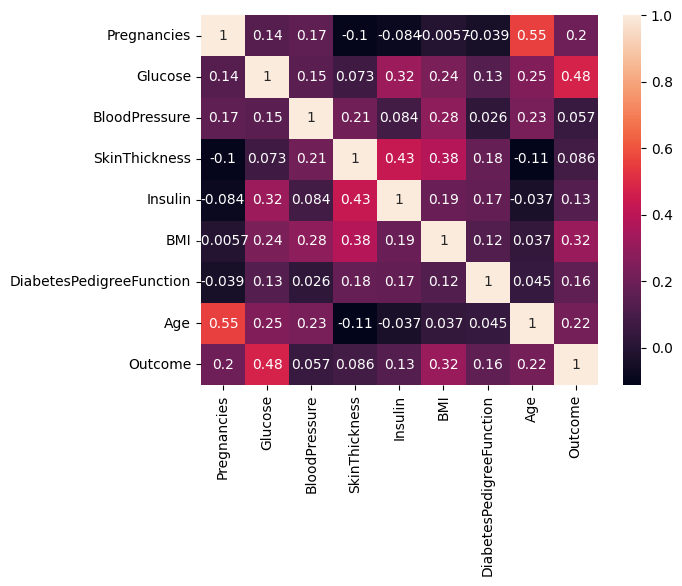

In [10]:
sns.heatmap(data.corr(),annot=True)

* Age and Pregnancies have positive corelation, out come and Glucose level has positive correlation

<Axes: xlabel='Pregnancies', ylabel='Count'>

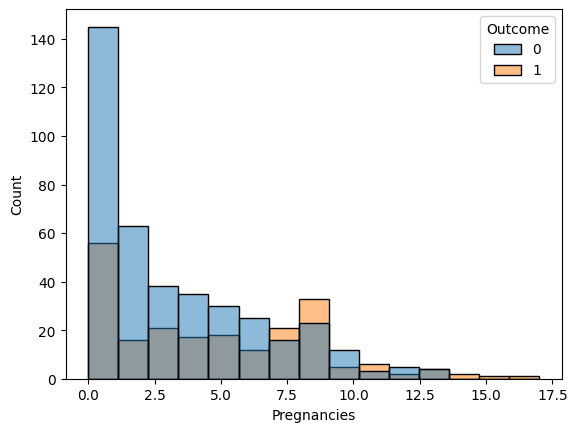

In [11]:
sns.histplot(data,x = data['Pregnancies'],hue = 'Outcome')

* As pregnancies feature is categoriesed we can find the percentage of chances of each categories to have diabetes. 

In [12]:
data.groupby(["Pregnancies","Outcome"])["Outcome"].count()

Pregnancies  Outcome
0            0          60
             1          33
1            0          85
             1          23
2            0          63
             1          16
3            0          38
             1          21
4            0          35
             1          17
5            0          30
             1          18
6            0          25
             1          12
7            0          16
             1          21
8            0          15
             1          17
9            0           8
             1          16
10           0          12
             1           5
11           0           3
             1           6
12           0           5
             1           2
13           0           4
             1           4
14           1           2
15           1           1
17           1           1
Name: Outcome, dtype: int64

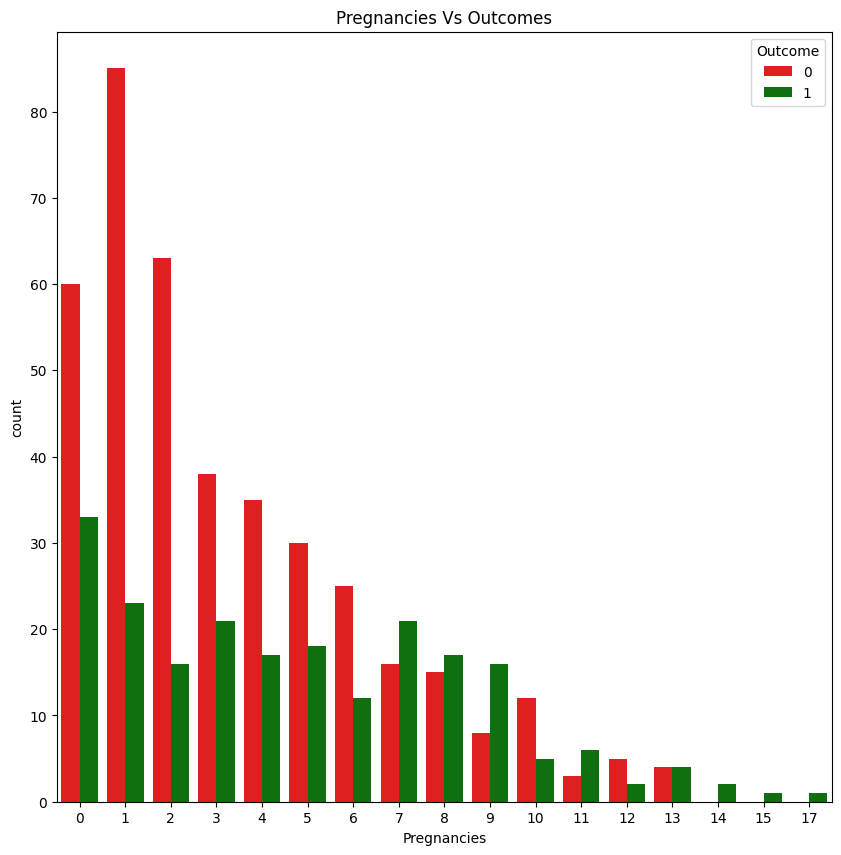

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x='Pregnancies',data=data,hue='Outcome',palette=['red','green'])
plt.title("Pregnancies Vs Outcomes")
plt.show()

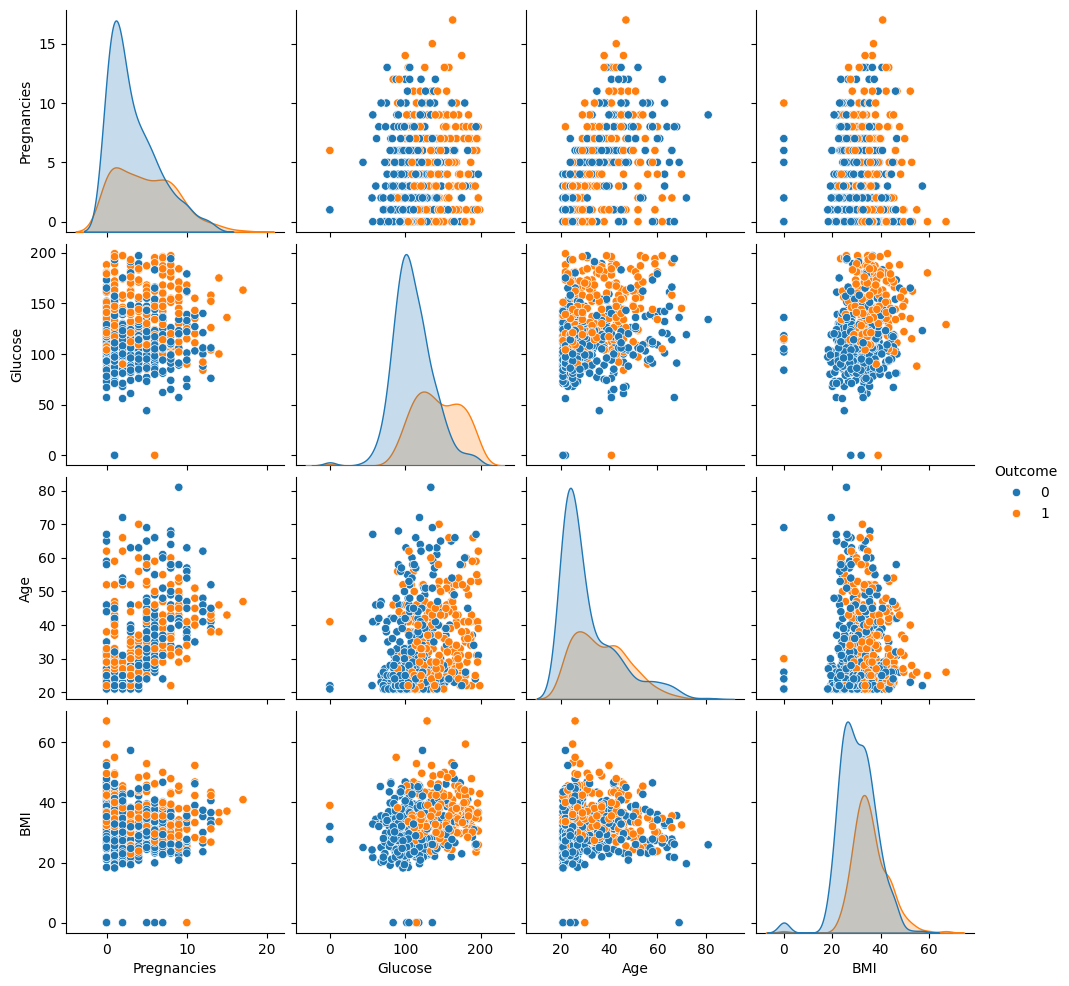

In [18]:
sns.pairplot(data[['Pregnancies','Glucose','Age','BMI','Outcome']],hue ='Outcome')

* From this we can understand that how the outcomes distributed in each category

In [19]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

25
3
185
299
7


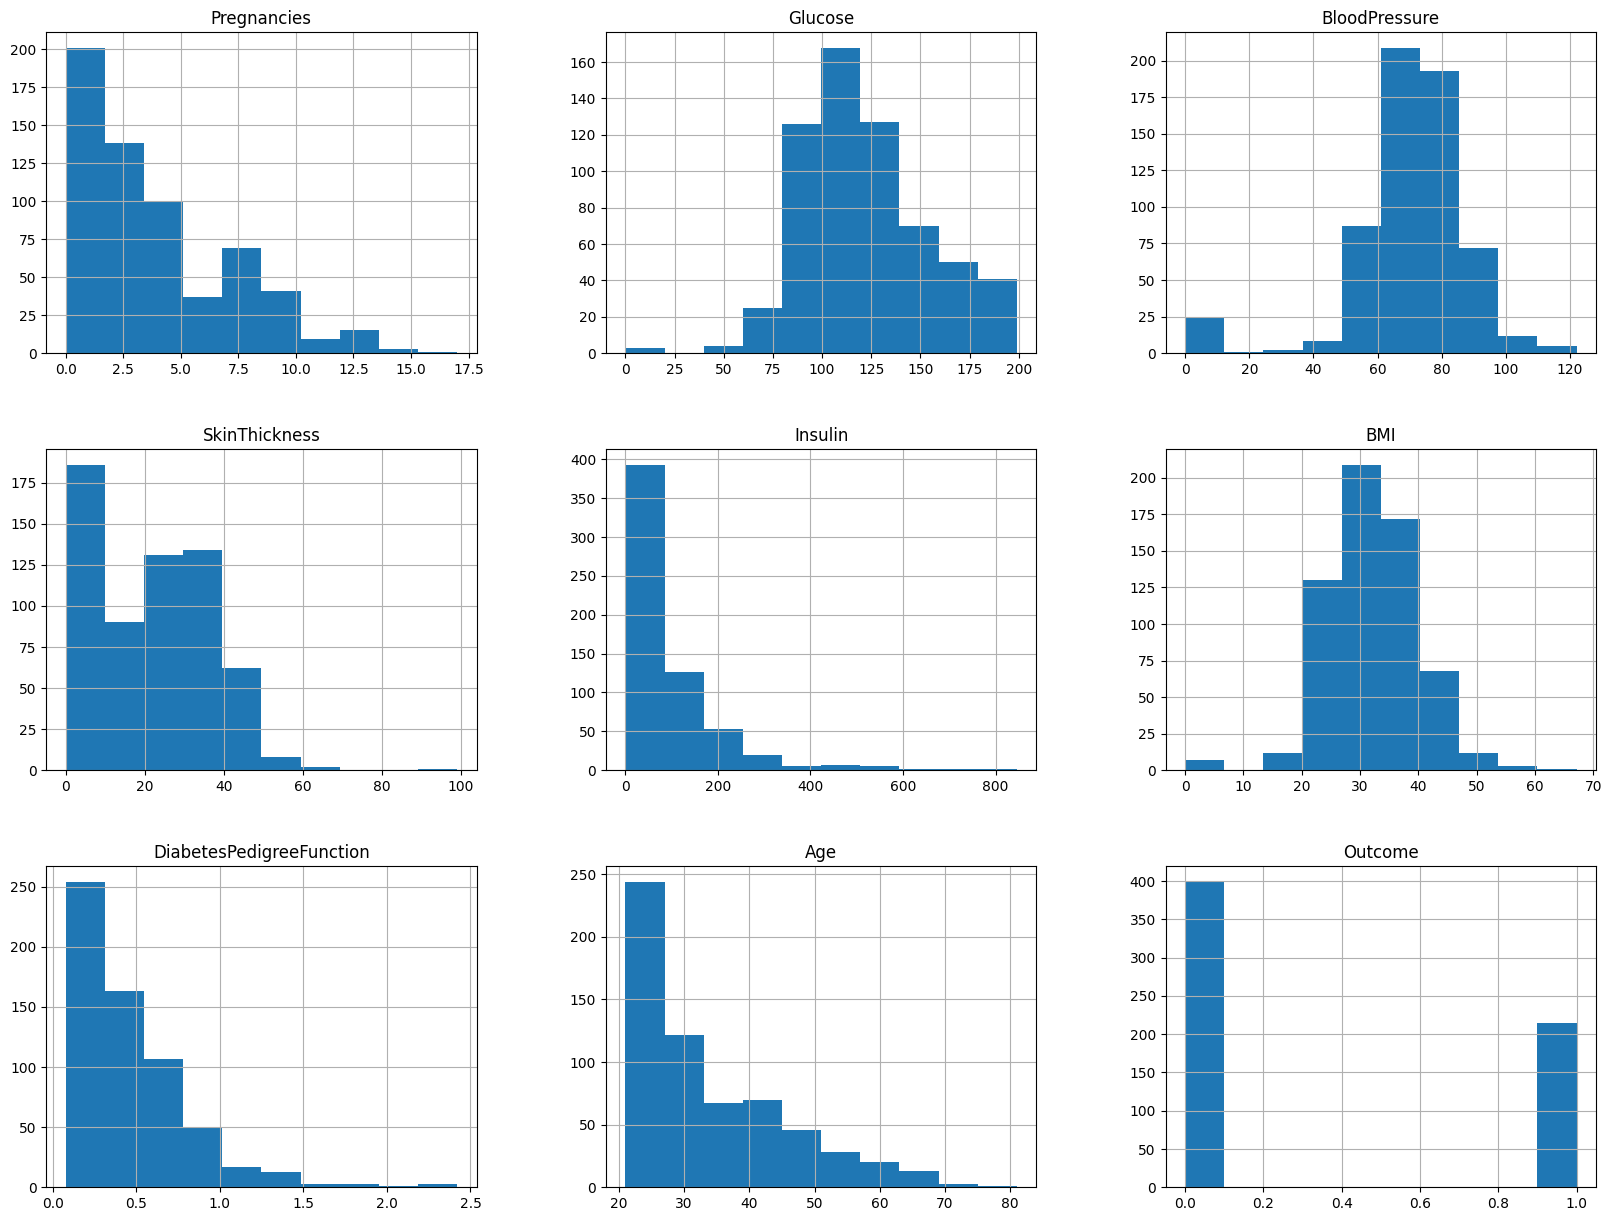

In [20]:
data.hist(figsize=(20,15))
plt.show()

Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

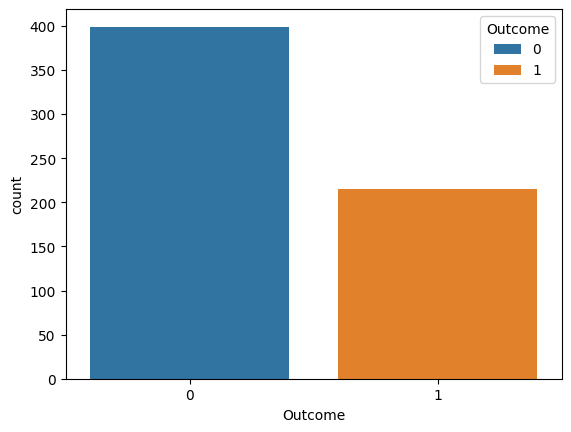

In [21]:
sns.countplot(x='Outcome', data=data,hue='Outcome')
plt.show()

In [22]:
#outliers checking
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index
numcols = numcols[numcols != 'Outcome']

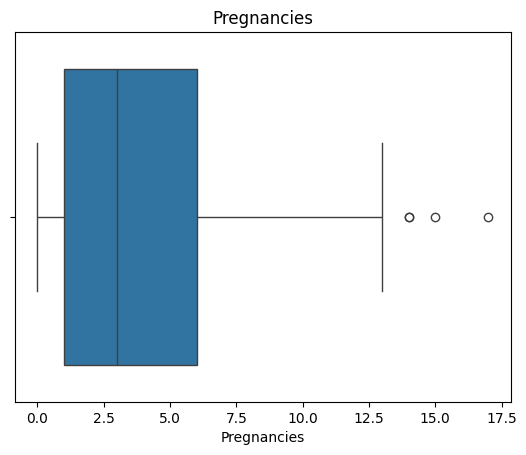

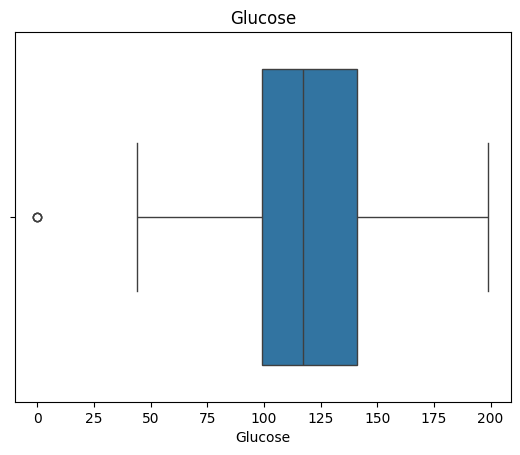

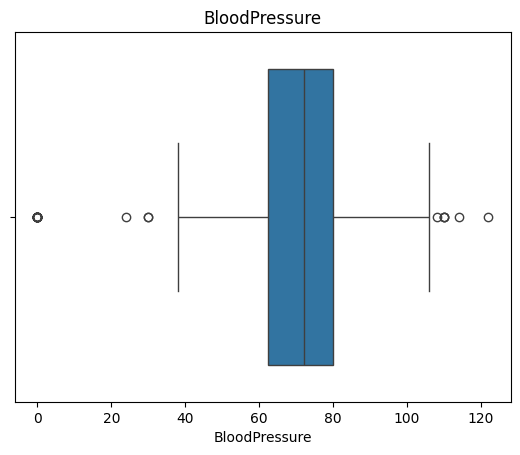

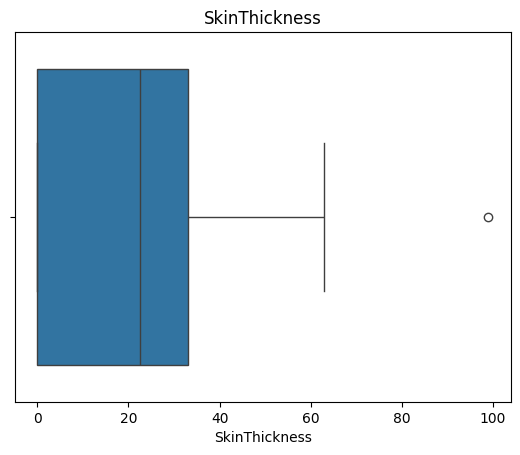

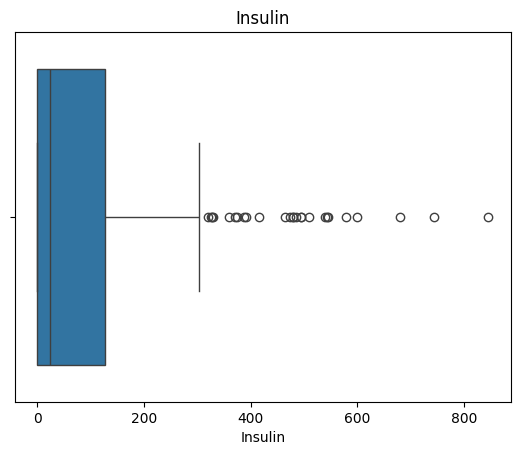

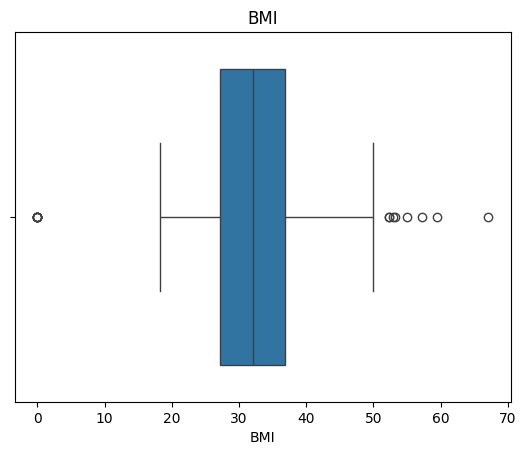

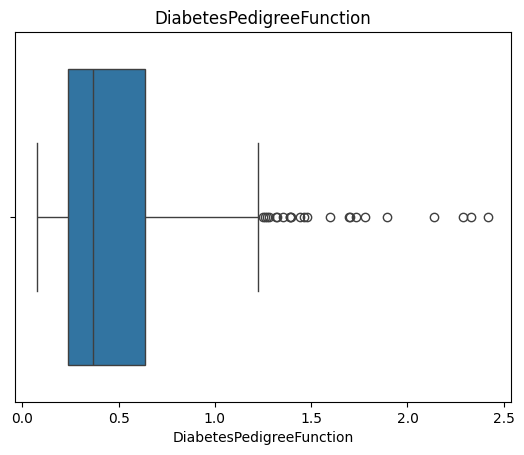

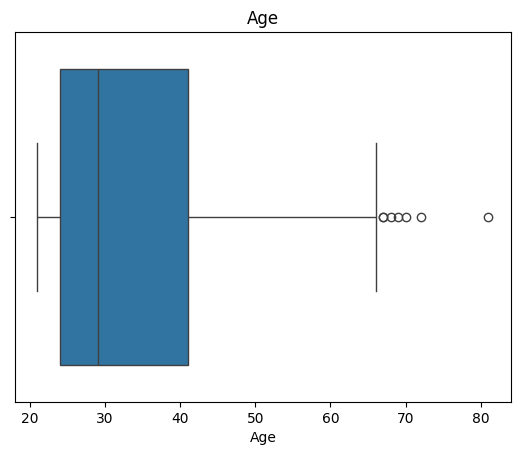

In [23]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

* from this we can see Pregnancies,BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

In [24]:
numcols = numcols[numcols != 'Glucose']
for x in numcols:
    print(x)
    descr = data[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    upper_limit = np.int64(upper_limit)
    lower_limit =  descr['25%'] - 1.5 * IQR  
    lower_limit=np.int64(lower_limit)
    #outlier replacement
    data.loc[data[x] > upper_limit, x] = upper_limit
    data.loc[data[x] < lower_limit, x] = lower_limit

Pregnancies
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


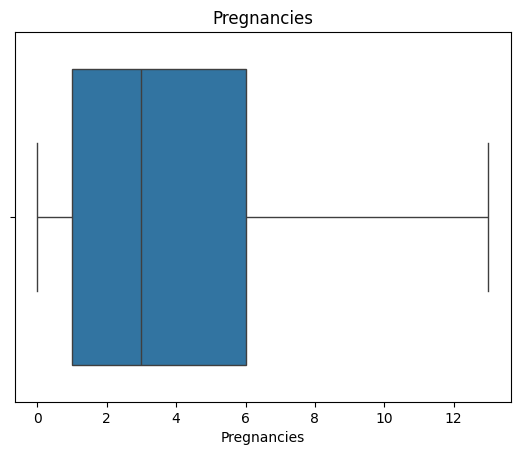

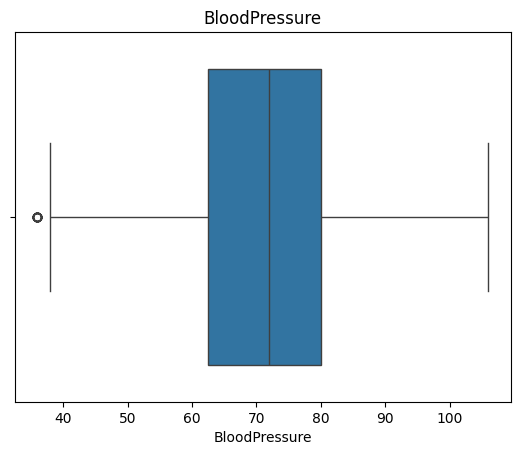

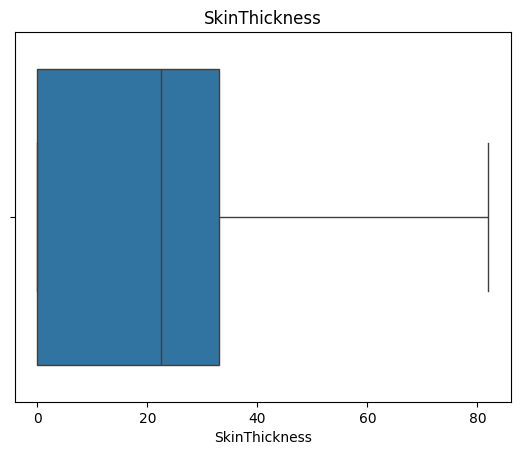

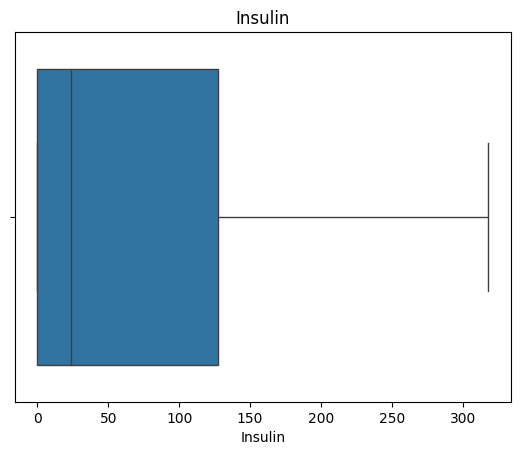

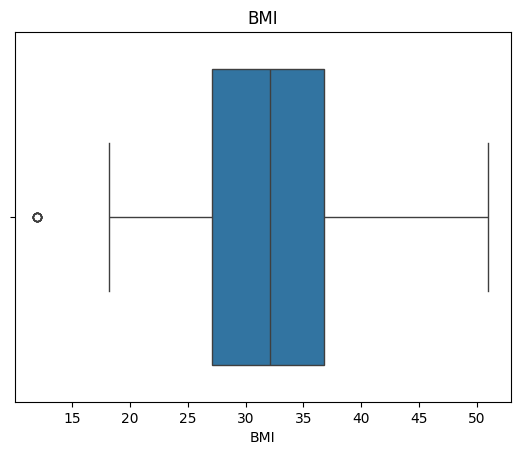

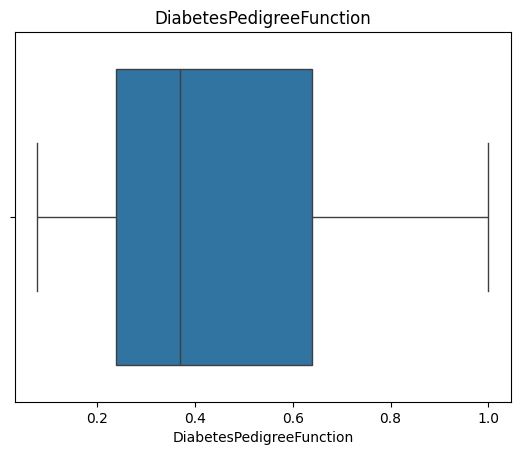

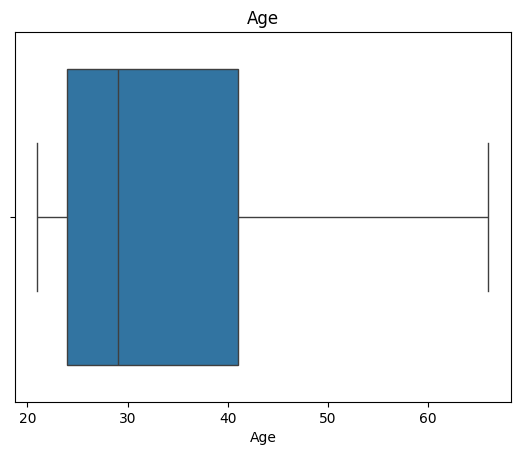

In [25]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [27]:
#spliting data 
target_name='Outcome'
y= data[target_name]#given predictions - training data 
X=data.drop(target_name,axis=1)

In [28]:
#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
X_train.shape,y_train.shape

((491, 8), (491,))

In [30]:
X_test.shape,y_test.shape

((123, 8), (123,))

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [36]:
logreg = LogisticRegression(max_iter=1000)

In [37]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred_logreg = logreg.predict(X_test)

In [39]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7479674796747967
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        86
           1       0.59      0.51      0.55        37

    accuracy                           0.75       123
   macro avg       0.70      0.68      0.69       123
weighted avg       0.74      0.75      0.74       123



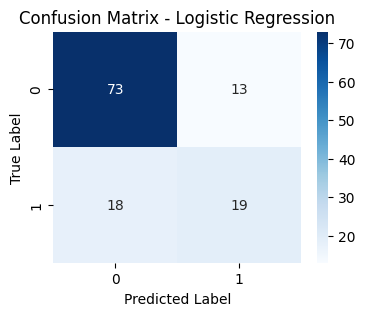

In [40]:
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
decision_tree = DecisionTreeClassifier()

In [43]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred_dt = decision_tree.predict(X_test)

In [45]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7154471544715447
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        86
           1       0.53      0.51      0.52        37

    accuracy                           0.72       123
   macro avg       0.66      0.66      0.66       123
weighted avg       0.71      0.72      0.71       123



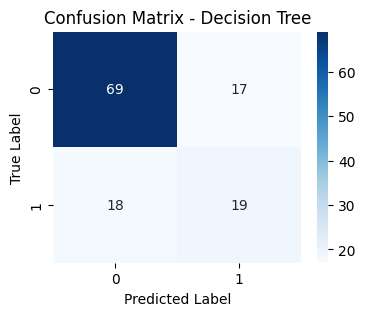

In [46]:
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred_rf = random_forest.predict(X_test)


In [50]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7154471544715447
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        86
           1       0.53      0.49      0.51        37

    accuracy                           0.72       123
   macro avg       0.66      0.65      0.65       123
weighted avg       0.71      0.72      0.71       123



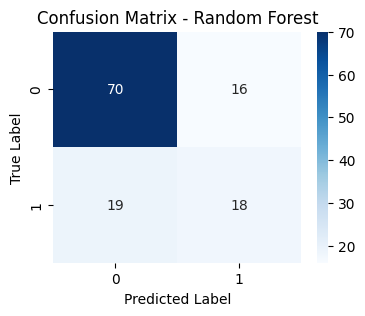

In [51]:
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()